<a href="https://colab.research.google.com/github/sriram403/RegressionProject/blob/main/Amazon_review_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [61]:
full_data = pd.read_csv("/content/amazon_alexa_data_new.csv",encoding='cp1252')
full_data

,Unnamed: 0,rating,date,variation,verified_reviews,feedback
0,0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,4,5,31-Jul-18,Charcoal Fabric,Music,1
...,...,...,...,...,...,...
3145,3145,5,30-Jul-18,Black Dot,"Perfect for kids, adults and everyone in betwe...",1
3146,3146,5,30-Jul-18,Black Dot,"Listening to music, searching locations, check...",1
3147,3147,5,30-Jul-18,Black Dot,"I do love these things, i have them running my...",1
3148,3148,5,30-Jul-18,White Dot,Only complaint I have is that the sound qualit...,1


In [62]:
data = full_data[["verified_reviews","feedback"]]
data

,verified_reviews,feedback
0,Love my Echo!,1
1,Loved it!,1
2,"Sometimes while playing a game, you can answer...",1
3,I have had a lot of fun with this thing. My 4 ...,1
4,Music,1
...,...,...
3145,"Perfect for kids, adults and everyone in betwe...",1
3146,"Listening to music, searching locations, check...",1
3147,"I do love these things, i have them running my...",1
3148,Only complaint I have is that the sound qualit...,1


In [63]:
data.feedback.value_counts()

1    2893
0     257
Name: feedback, dtype: int64

In [64]:
import numpy as np

np.sum(data.isna())

verified_reviews    79
feedback             0
dtype: int64

In [67]:
data.dropna(inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [68]:
np.sum(data.isnull())

verified_reviews    0
feedback            0
dtype: int64

In [69]:
data.feedback.value_counts()

1    2833
0     238
Name: feedback, dtype: int64

In [382]:
data[data["feedback"]==1].shape

(2833, 2)

In [383]:
data[data["feedback"]==0].shape

(238, 2)

In [70]:
Average_Words = round((sum(len(i.split(' '))for i in data["verified_reviews"]))/len(data["verified_reviews"]))
Average_Words

26

In [71]:
shuffled_data = data.sample(frac=1,random_state=42)
shuffled_data.head()

,verified_reviews,feedback
3039,Weak sound. Compared to the Google Home Mini t...,0
1788,We got this mainly for our son who is currentl...,1
2584,Very pleased,1
196,I love it!,1
243,I received the echo in perfect condition. The ...,1


In [43]:
text = shuffled_data["verified_reviews"]
text 

2965    Love it, we are still learning the capabilitie...
969                                      Very easy setup.
1385                                                     
1233    I purchased this on prime day mostly as a pres...
2996    Fun and  information.  No dislikes  so far !! ...
                              ...                        
3092    I love this technology. I'm older, but this is...
1095                                   Love my Echo Spot!
1130                                   Hands free control
1294    It has replaced my clock and Google Mini on my...
860                                       Easy to set up.
Name: verified_reviews, Length: 3150, dtype: object

In [416]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(shuffled_data["verified_reviews"],shuffled_data["feedback"],test_size=0.20,random_state=42)
x_train.shape,y_train.shape

((2456,), (2456,))

In [417]:
Average_Words = round((sum(len(i.split(" "))for i in x_train))/len(x_train))
Average_Words

26

In [418]:
x_train.sample()

313    Love it, still learning, makes a lot of things...
Name: verified_reviews, dtype: object

In [419]:
tf.keras.layers.TextVectorization()

In [420]:
import tensorflow as tf
T_V = tf.keras.layers.TextVectorization(max_tokens=10000,output_sequence_length=Average_Words)
T_V.adapt(x_train)

In [421]:
text = ["i need to change the world"]
T_V(text)

<tf.Tensor: shape=(1, 26), dtype=int64, numpy=
array([[  3, 124,   4, 494,   2, 717,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0]])>

In [422]:
words = T_V.get_vocabulary()
famous_word = words[:10]
least_famous_word = words[-10:]
famous_word,least_famous_word

(['', '[UNK]', 'the', 'i', 'to', 'it', 'and', 'a', 'my', 'is'],
 ['1990’s',
  '1990s',
  '1964',
  '19',
  '129',
  '1220',
  '1100sf',
  '1010',
  '100x',
  '1000'])

In [423]:
x_train = x_train.str.lower()
x_test = x_test.str.lower()

In [424]:
x_train

1101    it was a gift and the recipient love love love...
868     best father's day gift. dad joked to my mom th...
2814    love it.. makes the simple things in life simpler
1089    great sound and video plus all the great stuff...
1401    love the echo show.  being able to see the lyr...
                              ...                        
1910    when i got this echo i was excited to have a d...
1358    i’m leaving this for those who don’t have enou...
347     great sound for the size and the prize!! and o...
1703    sound is great,video is great. now i just need...
555     i purchased this refurbished.  works just like...
Name: verified_reviews, Length: 2456, dtype: object

In [425]:
import nltk
nltk.download('stopwords')
stop = stopwords.words("english")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [426]:
stop_word_stripped_x_train = x_train.apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

In [427]:
stop_word_stripped_x_test = x_test.apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

In [428]:
T_V.adapt(stop_word_stripped_x_train)

In [429]:
words = T_V.get_vocabulary()
f_words = words[:10]
l_words = words[-10:]
f_words,l_words

(['', '[UNK]', 'love', 'echo', 'great', 'alexa', 'it', 'music', 'like', 'use'],
 ['1990’s',
  '1990s',
  '1964',
  '19',
  '129',
  '1220',
  '1100sf',
  '1010',
  '100x',
  '1000'])

In [430]:
from nltk.stem import PorterStemmer
ps = PorterStemmer()

In [431]:
import string

In [432]:
t = stop_word_stripped_x_train.tolist()
test = stop_word_stripped_x_test.tolist()

In [433]:
da = pd.DataFrame(t,columns=["unstemmed"])
t_df = pd.DataFrame(test,columns=["unstemmed"])

In [434]:
da["unstemmed"] = da["unstemmed"].str.split()
t_df["unstemmed"] = t_df["unstemmed"].str.split()

In [435]:
s = da["unstemmed"].apply(lambda x: [ps.stem(y) for y in x])
s_test = t_df["unstemmed"].apply(lambda x:[ps.stem(y)for y in x])

In [436]:
temp = pd.DataFrame(s)
test_temp = pd.DataFrame(s_test)

In [437]:
dummy = []
for word in temp["unstemmed"]:
  dummy.append(" ".join(word))

In [438]:
test_dummy =[]
for word in test_temp["unstemmed"]:
  test_dummy.append(" ".join(word))

In [439]:
d = temp.copy()
t_d = test_temp.copy()
d["unstemmed"] = dummy
t_d["unstemmed"] = test_dummy

In [440]:
x_t = d["unstemmed"].str.replace(f'[{string.punctuation}]','')
test_x = t_d["unstemmed"].str.replace(f"[{string.punctuation}]",'')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  


In [441]:
from sklearn.feature_extraction.text import TfidfVectorizer
v = TfidfVectorizer()
v.fit_transform(x_t)

<2456x3633 sparse matrix of type '<class 'numpy.float64'>'
	with 30188 stored elements in Compressed Sparse Row format>

In [442]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
MN_model = Pipeline([('tfidf',TfidfVectorizer()),
                 ("multinomial",MultinomialNB())])
MN_model.fit(x_t,y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('multinomial', MultinomialNB())])

In [ ]:
pred_MN = MN_model.predict(test_x)

In [444]:
from sklearn.linear_model import LogisticRegression
LR_model = Pipeline([("tf",TfidfVectorizer()),
                  ("LR",LogisticRegression())])
LR_model.fit(x_t,y_train)

Pipeline(steps=[('tf', TfidfVectorizer()), ('LR', LogisticRegression())])

In [ ]:
pred_LR = LR_model.predict(test_x)

In [446]:
from sklearn.neighbors import KNeighborsClassifier
KN_model = Pipeline([("tf",TfidfVectorizer()),("KN",KNeighborsClassifier())])
KN_model.fit(x_t,y_train)

Pipeline(steps=[('tf', TfidfVectorizer()), ('KN', KNeighborsClassifier())])

In [ ]:
pred_KN = KN_model.predict(test_x)

In [461]:
from sklearn.metrics import confusion_matrix,classification_report
cm_MN = confusion_matrix(y_test,pred_MN)

array([[  0,  50],
       [  2, 563]])

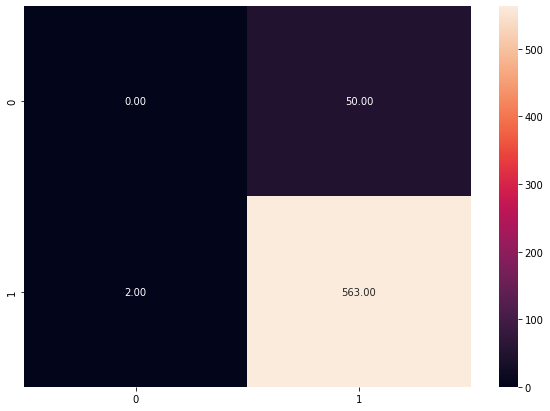

In [453]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True,fmt=".2f")

In [456]:
cm_KN = confusion_matrix(y_test,pred_KN)

array([[  0,  50],
       [  0, 565]])

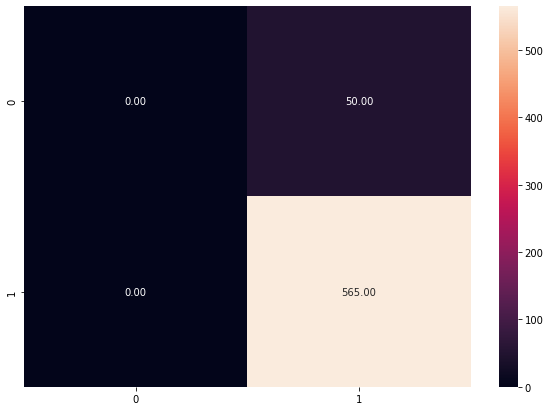

In [459]:
plt.figure(figsize=(10,7))
sns.heatmap(cm_KN,annot=True,fmt=".2f")

In [457]:
cm_LR = confusion_matrix(y_test,pred_LR)

array([[  0,  50],
       [  0, 565]])

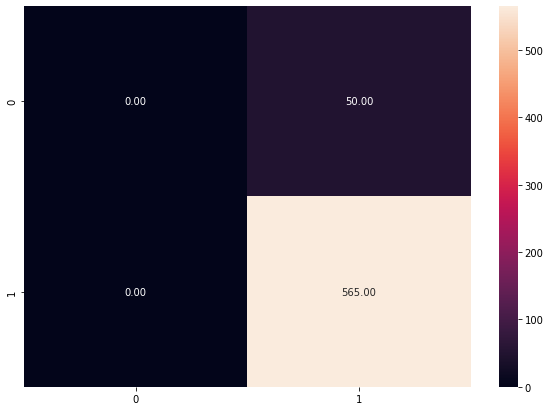

In [460]:
plt.figure(figsize=(10,7))
sns.heatmap(cm_LR,annot=True,fmt=".2f")

In [463]:
cr_MN = classification_report(y_test,pred_MN)
print(cr_MN)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        50
           1       0.92      1.00      0.96       565

    accuracy                           0.92       615
   macro avg       0.46      0.50      0.48       615
weighted avg       0.84      0.92      0.88       615



In [464]:
cr_LR = classification_report(y_test,pred_LR)
print(cr_LR)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        50
           1       0.92      1.00      0.96       565

    accuracy                           0.92       615
   macro avg       0.46      0.50      0.48       615
weighted avg       0.84      0.92      0.88       615



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [465]:
cr_KN = classification_report(y_test,pred_KN)
print(cr_KN)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        50
           1       0.92      1.00      0.96       565

    accuracy                           0.92       615
   macro avg       0.46      0.50      0.48       615
weighted avg       0.84      0.92      0.88       615



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
